# Project: Titanic Survival Decision Tree Predictor


In this project we'll be working with a real dataset provided by kaggle. 
We have provided two files, listed below with a brief description:
* `data.csv`: 
* `sample.csv`: 


## Load the Data and Take a Peek
Load the data from each of the csv files with the following naming conventions:
* `data.csv` into a DataFrame named `data`
* `sample.csv` into a DataFrame named `sample`

In [1]:
import pandas as pd
# Load the passenger data
data = pd.read_csv('data.csv')
sample = pd.read_csv('sample.csv')
pd.options.display.max_columns = 20
pd.options.display.max_colwidth = 60

In [2]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(len(data))
print(data.columns)

891
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


## Clean the Data

We are getting really close to the fun analysis part! We just have to clean our data a bit so we can focus on the features that might have predictive power for determining survival.

In a tree decision model, our features will ideally be continuous variables that have an affect on our dependent variable, survived or not. For this project with will also be working with some features that are binary, on the scale [0,1].


In [5]:
# Update sex column to numerical
data['Sex'] = data["Sex"].apply(lambda x:  1 if x == 'female' else 0)
sample['Sex'] = sample["Sex"].apply(lambda x:  1 if x == 'female' else 0)
#remove list
remove = ['Embarked']
data.drop(columns=remove,axis=1, inplace=True)

In [6]:
data.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
dtype: bool

In [7]:
import numpy as np
data.fillna({'Fare': np.mean(data['Fare']),
           'Age': np.mean(data['Age']),
           'Cabin': 0},
            inplace=True)
data.isna().any()


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
dtype: bool

In [8]:
sample.fillna({'Fare': np.mean(data['Fare']),
           'Age': np.mean(data['Age']),
           'Cabin': 0},
            inplace=True)
sample.isna().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,38.0,1,0,PC 17599,71.2833,C85
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [10]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Exploratory Analysis

Now that our data is all together, let's investigate some of the different features to see what might correlate most with our dependent variable,survived

In [11]:
data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000


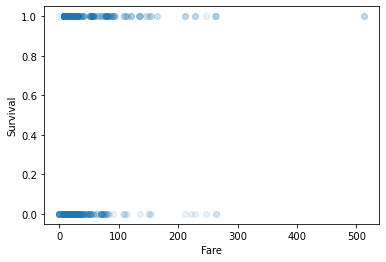

In [12]:
from matplotlib import pyplot as plt

plt.scatter(data['Fare'],data['Survived'],alpha=0.1)
plt.xlabel('Fare')
plt.ylabel('Survival')
plt.show()

from the above graph,the survived passengers' ticket fare is slightly higher than the non-survived passengers

In [13]:
sex_sur = data.groupby(['Sex','Survived'])['PassengerId'].count()/data.groupby(['Sex'])['PassengerId'].count()
sex_sur = sex_sur.unstack()
print(sex_sur)

Survived         0         1
Sex                         
0         0.811092  0.188908
1         0.257962  0.742038


<AxesSubplot:xlabel='Sex'>

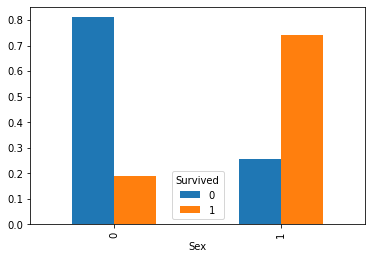

In [14]:
sex_sur.plot(kind='bar')


from the above table we can see that there is significant correlation

In [15]:
pclass = data.groupby(['Pclass','Survived'])['PassengerId'].count()/data.groupby(['Pclass'])['PassengerId'].count()
pclass = pclass.unstack()
print(pclass)


Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


<AxesSubplot:xlabel='Pclass'>

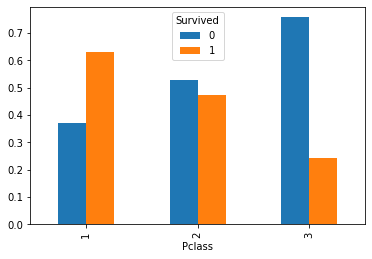

In [16]:
pclass.plot(kind='bar')

## Data Selection

In [17]:
features1 = data[['Sex','Fare','Pclass']]
labels = data['Survived']

## Split the Data into Training and Testing Sets


1. The training data (features), which we can assign to `train_data`
2. The testing data (features), which we can assign to `test_data`
3. The training dependent variable (Yelp rating), which we can assign to `train_label`
4. The testing dependent variable (Yelp rating), which we can assign to `test_label

In [18]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_labels,test_labels = train_test_split(features1,labels,random_state=1)

## Create and Train the Model

Now that our data is split into training and testing sets, we can finally model! In the cell below we have provided the code to import `LinearRegression` from scikit-learn's `linear_model` module. Create a new `LinearRegression` object named model. The `.fit()` method will fit our Linear Regression model to our training data and calculate the coefficients for our features. Call the `.fit()` method on `model` with `X_train` and `y_train` as parameters. Just like that our model has now been trained on our training data!


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [20]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,38.0,1,0,PC 17599,71.2833,C85
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


## Evaluate and Understand the Model

Now we can evaluate our model in a variety of ways. The first way will be by using the `.score()` method, which provides the R^2 value for our model.

In [21]:
forest = RandomForestClassifier(random_state = 1)
forest.fit(train_data,train_labels)
print('forestscore',forest.score(test_data,test_labels))
# Score the model on the train data
print(forest.feature_importances_)


forestscore 0.8430493273542601
[0.32931698 0.56496695 0.10571607]


In [22]:
score = []
for i in range(1,21):
 tree = DecisionTreeClassifier(random_state = 1,max_depth = i)
 tree.fit(train_data,train_labels)
 score.append(tree.score(test_data,test_labels))
print(max(score))
print(score.index(max(score)))

0.8565022421524664
10


In [23]:
tree = DecisionTreeClassifier(random_state = 1,max_depth = 11)
tree.fit(train_data,train_labels)
print(tree.score(test_data,test_labels))
#kaggle 0.75837


0.8565022421524664


## Define Different Subsets of Data

In [24]:
all_features = data[['Pclass','Sex','Age','SibSp','Parch','Fare']]
sample2 = sample[['Pclass','Sex','Age','SibSp','Parch','Fare']]
train_data2,test_data2,train_labels2,test_labels2 = train_test_split(all_features,labels,random_state=1)
forest2 = RandomForestClassifier(random_state = 1)
forest2.fit(train_data2,train_labels2)
print('forestscore',forest2.score(test_data2,test_labels2))
# Score the model on the train data
print(forest2.feature_importances_)
score2 = []
for i in range(1,21):
 tree2 = DecisionTreeClassifier(random_state = 1,max_depth = i)
 tree2.fit(train_data2,train_labels2)
 score2.append(tree2.score(test_data2,test_labels2))
print(max(score2))
print(score2.index(max(score2)))
#kaggle 0.73205

forestscore 0.7668161434977578
[0.08633683 0.25922988 0.27646862 0.05263995 0.04060534 0.28471938]
0.8071748878923767
4


In [25]:
features4 = data[['Pclass','Sex','Age',"SibSp",'Fare']]
sample4 = sample[['Pclass','Sex','Age',"SibSp",'Fare']]
train_data4,test_data4,train_labels4,test_labels4 = train_test_split(features4,labels,random_state=1)
forest4 = RandomForestClassifier(random_state = 1)
forest4.fit(train_data4,train_labels4)
print('forestscore',forest4.score(test_data4,test_labels4))
# Score the model on the train data
print(forest4.feature_importances_)
score4 = []
for i in range(1,21):
 tree4 = DecisionTreeClassifier(random_state = 1,max_depth = i)
 tree4.fit(train_data4,train_labels4)
 score4.append(tree4.score(test_data4,test_labels4))
print(max(score4))
print(score4.index(max(score4)))
tree4 = DecisionTreeClassifier(random_state = 1,max_depth = 5)
tree4.fit(train_data4,train_labels4)
#kaggle 0.77990

forestscore 0.7802690582959642
[0.09429105 0.27275932 0.29643418 0.05028609 0.28622936]
0.8116591928251121
4


DecisionTreeClassifier(max_depth=5, random_state=1)

Lets take a look at whether cabins position affects the survival probabilities

In [26]:
# update cabin column to numerical
data['Cabin'] = data['Cabin'].str.split("",0).str[1]
sample['Cabin'] = sample['Cabin'].str.split("",0).str[1]
data['Cabin'] = data['Cabin'].fillna(value = 0)
sample['Cabin'] = sample['Cabin'].fillna(value = 0)
print(data['Cabin'].value_counts())

0    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


In [27]:
cabin = data.groupby(['Cabin','Survived'])['PassengerId'].count()/data.groupby(['Cabin'])['PassengerId'].count()
cabin = cabin.unstack()
print(cabin)

Survived         0         1
Cabin                       
0         0.700146  0.299854
A         0.533333  0.466667
B         0.255319  0.744681
C         0.406780  0.593220
D         0.242424  0.757576
E         0.250000  0.750000
F         0.384615  0.615385
G         0.500000  0.500000
T         1.000000       NaN


<AxesSubplot:xlabel='Cabin'>

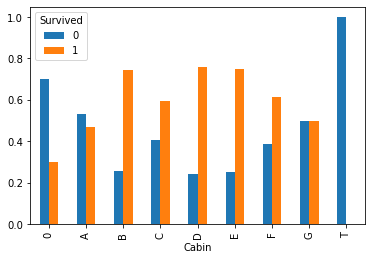

In [28]:
cabin.plot(kind='bar')

Seems like the in cabin (b,c,d,e,f) have a larger possibility to survive

In [29]:
data['CabinBDE'] = data["Cabin"].apply(lambda x:  1 if x == 'B' or x =='D' or x =='E'  else 0)
sample['CabinBDE'] = sample["Cabin"].apply(lambda x:  1 if x == 'B' or x =='D' or x =='E' else 0)
data['CabinCF'] = data["Cabin"].apply(lambda x:  1 if x == 'C' or x =='E'  else 0)
sample['CabinCF'] = sample["Cabin"].apply(lambda x:  1 if x == 'C' or  x =='E' else 0)
print(data['CabinBDE'].value_counts())

0    779
1    112
Name: CabinBDE, dtype: int64


In [30]:
features3 = data[['Pclass','Sex','Age',"SibSp",'Fare','CabinBDE','CabinCF']]
sample3 = sample[['Pclass','Sex','Age',"SibSp",'Fare','CabinBDE','CabinCF']]
train_data3,test_data3,train_labels3,test_labels3 = train_test_split(features3,labels,random_state=1)
forest3 = RandomForestClassifier(random_state = 1)
forest3.fit(train_data3,train_labels3)
print('forestscore',forest3.score(test_data3,test_labels3))
# Score the model on the train data
print(forest3.feature_importances_)
score3 = []
for i in range(1,21):
 tree3 = DecisionTreeClassifier(random_state = 1,max_depth = i)
 tree3.fit(train_data3,train_labels3)
 score3.append(tree3.score(test_data3,test_labels3))
print(max(score3))
print(score3.index(max(score3)))
tree3 = DecisionTreeClassifier(random_state = 1,max_depth = 3)
tree3.fit(train_data3,train_labels3)
#kaggle 0.77990

forestscore 0.7668161434977578
[0.07664441 0.25834867 0.28360569 0.05167886 0.27656005 0.03538779
 0.01777452]
0.8026905829596412
2


DecisionTreeClassifier(max_depth=3, random_state=1)

there is no improvement lets try different lambda on cabin

In [31]:
data['Cabinall'] = data["Cabin"].apply(lambda x:  1 if x == 'D'  else 0)
sample['Cabinall'] = sample["Cabin"].apply(lambda x:  1 if x == 'D' else 0)

In [32]:
features2 = data[['Pclass','Sex','Age',"SibSp",'Fare','Cabinall']]
sample2 = sample[['Pclass','Sex','Age',"SibSp",'Fare','Cabinall']]
train_data2,test_data2,train_labels2,test_labels2 = train_test_split(features2,labels,random_state=1)
forest2 = RandomForestClassifier(random_state = 1)
forest2.fit(train_data2,train_labels2)
print('forestscore',forest2.score(test_data2,test_labels2))
# Score the model on the train data
print(forest2.feature_importances_)
score2 = []
for i in range(1,21):
 tree2 = DecisionTreeClassifier(random_state = 1,max_depth = i)
 tree2.fit(train_data2,train_labels2)
 score2.append(tree2.score(test_data2,test_labels2))
print(max(score2))
print(score2.index(max(score2)))
tree2 = DecisionTreeClassifier(random_state = 1,max_depth = 5)
tree2.fit(train_data2,train_labels2)
#0.77990

forestscore 0.7757847533632287
[0.08751236 0.26496985 0.28914967 0.05170118 0.29760931 0.00905764]
0.8071748878923767
4


DecisionTreeClassifier(max_depth=5, random_state=1)

based on the kaggle results <br>
features3 = data[['Pclass','Sex','Age',"SibSp",'Fare','CabinBDE','CabinCF']] <br>
features2 = sample[['Pclass','Sex','Age',"SibSp",'Fare','Cabinall']] <br>
features4 = data[['Pclass','Sex','Age',"SibSp",'Fare']] <br>
are the best model's features

In [33]:
#updata name by title
data['title'] = data['Name'].str.split(",",1).str[1]
data['title'] = data['title'].str.split(" ",2).str[1]
sample['title'] = sample['Name'].str.split(",",1).str[1]
sample['title'] = sample['title'].str.split(" ",2).str[1]
print(data['title'].value_counts())


Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Mlle.          2
Major.         2
Don.           1
Ms.            1
Lady.          1
Sir.           1
Jonkheer.      1
Mme.           1
Capt.          1
the            1
Name: title, dtype: int64


In [34]:
title = data.groupby(['title','Survived'])['PassengerId'].count()/data.groupby(['title'])['PassengerId'].count()
title = title.unstack()
print(title)

Survived          0         1
title                        
Capt.      1.000000       NaN
Col.       0.500000  0.500000
Don.       1.000000       NaN
Dr.        0.571429  0.428571
Jonkheer.  1.000000       NaN
Lady.           NaN  1.000000
Major.     0.500000  0.500000
Master.    0.425000  0.575000
Miss.      0.302198  0.697802
Mlle.           NaN  1.000000
Mme.            NaN  1.000000
Mr.        0.843327  0.156673
Mrs.       0.208000  0.792000
Ms.             NaN  1.000000
Rev.       1.000000       NaN
Sir.            NaN  1.000000
the             NaN  1.000000


In [35]:
data['title_miss'] = data["title"].apply(lambda x:  1 if x == 'Miss.' else 0)
sample['title_miss'] = sample["title"].apply(lambda x:  1 if x == 'Miss.' else 0)
data['title_mrs'] = data["title"].apply(lambda x:  1 if x == 'Mrs.' else 0)
sample['title_mrs'] = sample["title"].apply(lambda x:  1 if x == 'Mrs.' else 0)
data['title_mr'] = data["title"].apply(lambda x:  1 if x == 'Mr.'  else 0)
sample['title_mr'] = sample["title"].apply(lambda x:  1 if x == 'Mr.'  else 0)


In [36]:
features5 = data[['Pclass','Sex','Age',"SibSp",'Fare','title_miss','title_mrs','title_mr']]
sample5 = sample[['Pclass','Sex','Age',"SibSp",'Fare','title_miss','title_mrs','title_mr']]
train_data5,test_data5,train_labels5,test_labels5 = train_test_split(features5,labels,random_state=1)
forest5 = RandomForestClassifier(random_state = 1)
forest5.fit(train_data5,train_labels5)
print('forestscore',forest5.score(test_data5,test_labels5))
# Score the model on the train data
print(forest5.feature_importances_)
score5 = []
for i in range(1,21):
 tree5 = DecisionTreeClassifier(random_state = 1,max_depth = i)
 tree5.fit(train_data5,train_labels5)
 score5.append(tree5.score(test_data5,test_labels5))
print(max(score5))
print(score5.index(max(score5)))
tree5 = DecisionTreeClassifier(random_state = 1,max_depth = 4)
tree5.fit(train_data5,train_labels5)
#0.77511

forestscore 0.7937219730941704
[0.08338137 0.1108287  0.25440563 0.05354132 0.28004637 0.03392419
 0.03433976 0.14953265]
0.8161434977578476
3


DecisionTreeClassifier(max_depth=4, random_state=1)

In [37]:
features6 = data[['Pclass','Sex','Age',"SibSp",'Fare','CabinBDE','title_mrs','title_mr']]
sample6 = sample[['Pclass','Sex','Age',"SibSp",'Fare','CabinBDE','title_mrs','title_mr']]
train_data6,test_data6,train_labels6,test_labels6 = train_test_split(features6,labels,random_state=1)
forest6 = RandomForestClassifier(random_state = 1)
forest6.fit(train_data6,train_labels6)
print('forestscore',forest6.score(test_data6,test_labels6))
# Score the model on the train data
print(forest6.feature_importances_)
score6 = []
for i in range(1,21):
 tree6 = DecisionTreeClassifier(random_state = 1,max_depth = i)
 tree6.fit(train_data6,train_labels6)
 score6.append(tree6.score(test_data6,test_labels6))
print(max(score6))
print(score6.index(max(score6)))
tree6 = DecisionTreeClassifier(random_state = 1,max_depth = 5)
tree6.fit(train_data6,train_labels6)
#kaggle 0.75119

forestscore 0.7713004484304933
[0.0738501  0.12354654 0.25348199 0.05643621 0.2622406  0.03546204
 0.03861029 0.15637223]
0.8116591928251121
4


DecisionTreeClassifier(max_depth=5, random_state=1)

In [38]:
features7 = data[['Pclass','Sex','Age',"SibSp",'Fare','title_mr','CabinBDE','CabinCF']]
sample7 = sample[['Pclass','Sex','Age',"SibSp",'Fare','title_mr','CabinBDE','CabinCF']]
train_data7,test_data7,train_labels7,test_labels7 = train_test_split(features7,labels,random_state=1)
forest7 = RandomForestClassifier(random_state = 1)
forest7.fit(train_data7,train_labels7)
print('forestscore',forest7.score(test_data7,test_labels7))
# Score the model on the train data
print(forest7.feature_importances_)
score7 = []
for i in range(1,21):
 tree7 = DecisionTreeClassifier(random_state = 1,max_depth = i)
 tree7.fit(train_data7,train_labels7)
 score7.append(tree7.score(test_data7,test_labels7))
print(max(score7))
print(score7.index(max(score7)))
tree7 = DecisionTreeClassifier(random_state = 1,max_depth = 5)
tree7.fit(train_data7,train_labels7)
#0.75119

forestscore 0.7847533632286996
[0.07495091 0.14221196 0.24768604 0.05758037 0.26698993 0.16266835
 0.0294301  0.01848235]
0.8116591928251121
4


DecisionTreeClassifier(max_depth=5, random_state=1)

In [39]:
survival_test = pd.DataFrame()
survival_test['Survived'] = tree7.predict(sample7).tolist()

In [40]:
test_result = pd.merge(sample['PassengerId'],survival_test,how = 'left',left_index = True, right_index = True)
test_result.to_csv(r'/Users/ngsumyu/Desktop/titanic/titanic_prediction/test_prediction.csv',index=False,header=True)

